<a href="https://colab.research.google.com/github/Sajish06/task6/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

In [2]:
from google.colab import files
uploaded = files.upload()

fn = list(uploaded.keys())[0]
df = pd.read_csv(fn)
print("Loaded:", fn)

Saving Iris.csv to Iris.csv
Loaded: Iris.csv


In [4]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("Class distribution:")
print(df['target' if 'target' in df.columns else 'Species'].value_counts())

Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [5]:
if 'target' in df.columns:
    X = df.drop(columns=['target', 'target_name'], errors='ignore')
    y = df['target']
elif 'Species' in df.columns:
    X = df.drop(columns=['Species'])
    y = df['Species']
else:
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (120, 5) Test: (30, 5)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Best k (by CV): 5
CV scores: [(1, np.float64(0.9917)), (3, np.float64(0.9917)), (5, np.float64(1.0)), (7, np.float64(0.9917)), (9, np.float64(0.9917)), (11, np.float64(0.9917)), (13, np.float64(0.9917)), (15, np.float64(0.9917)), (17, np.float64(0.9833)), (19, np.float64(0.9833)), (21, np.float64(0.9833)), (23, np.float64(0.9833)), (25, np.float64(0.9667)), (27, np.float64(0.9667)), (29, np.float64(0.9667))]


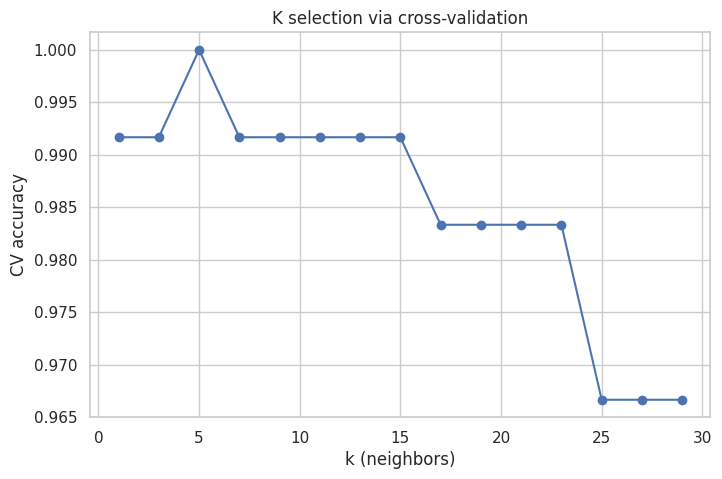

In [8]:
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 31, 2))
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print("Best k (by CV):", best_k)
print("CV scores:", list(zip(k_values, np.round(cv_scores,4))))

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("k (neighbors)")
plt.ylabel("CV accuracy")
plt.title("K selection via cross-validation")
plt.show()

In [9]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

print("Test Accuracy (best_k={}):".format(best_k), accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Test Accuracy (best_k=5): 1.0
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



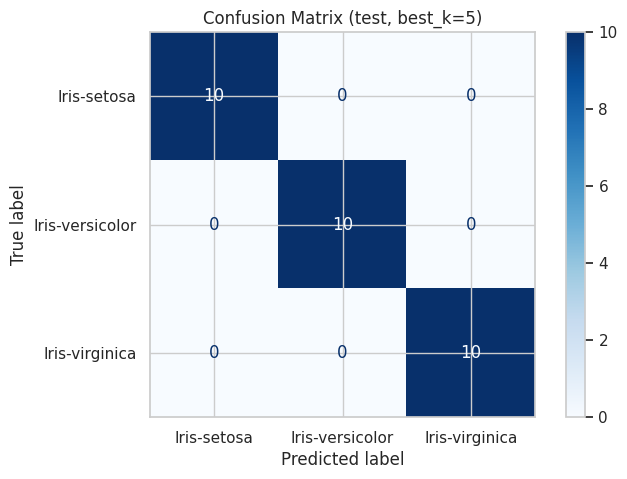

In [10]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

labels = np.unique(y)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_best),
                              display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (test, best_k={})".format(best_k))
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

if y_train.dtype == 'object' or y_train.dtype == 'string':
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
else:
    y_train_encoded = y_train.copy()

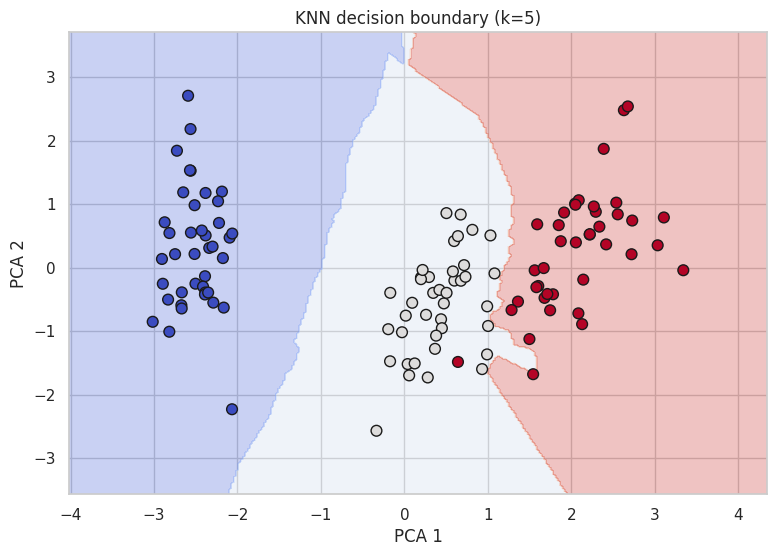

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

knn2d = KNeighborsClassifier(n_neighbors=best_k)
knn2d.fit(X_train_pca, y_train_encoded)

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn2d.predict(grid)
Z = Z.astype(float).reshape(xx.shape)

plt.figure(figsize=(9,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],
            c=y_train_encoded, edgecolor='k', s=60, cmap='coolwarm')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"KNN decision boundary (k={best_k})")
plt.show()